# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data.loc[(combined_data.duplicated(subset=['Mouse ID', "Timepoint"], keep=False))]
duplicate_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
combined_data.loc[combined_data["Mouse ID"] == "g989", :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.loc[combined_data["Mouse ID"] != "g989", :]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame
len(cleaned_data["Mouse ID"].unique())

248

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

## Bar and Pie Charts

Text(0, 0.5, 'Timepoints')

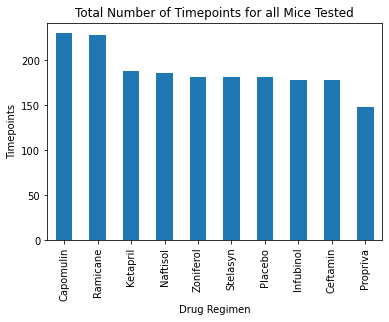

In [55]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
cleaned_data.groupby("Drug Regimen").count()["Timepoint"].sort_values(ascending=False).plot(kind="bar")
plt.title("Total Number of Timepoints for all Mice Tested")
plt.ylabel("Timepoints")

Text(0, 0.5, 'Timepoints')

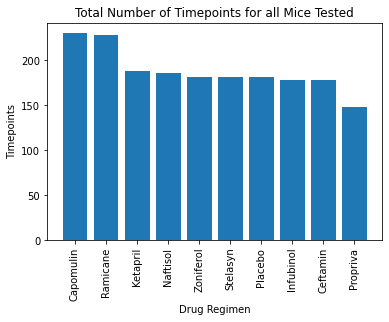

In [53]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_data = pd.DataFrame(cleaned_data.groupby("Drug Regimen").count()["Timepoint"].sort_values(ascending=False))
drugs = bar_data.index.tolist()
bar_x = np.arange(len(drugs))
tick_locations = [value for value in bar_x]
plt.bar(bar_x, bar_data["Timepoint"])
plt.title("Total Number of Timepoints for all Mice Tested")
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")


Text(0, 0.5, 'Sex')

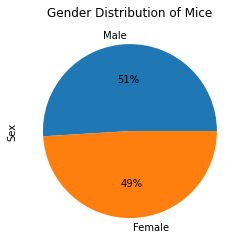

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_data.groupby("Sex").count()["Mouse ID"].sort_values(ascending=False).plot(kind="pie", autopct='%1.0f%%')
plt.title("Gender Distribution of Mice")
plt.ylabel("Sex")


Text(0, 0.5, 'Sex')

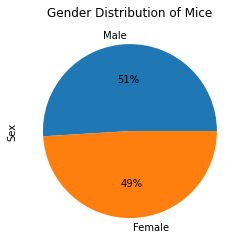

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = pd.DataFrame(cleaned_data.groupby("Sex").count()["Mouse ID"].sort_values(ascending=False))
labels = mice_gender.index.tolist()
pie_values = mice_gender["Mouse ID"].values.tolist()
plt.pie(pie_values, labels=labels, autopct='%1.0f%%')
plt.title("Gender Distribution of Mice")
plt.ylabel("Sex")



## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [40]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

## Line and Scatter Plots

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
